## Importación de librerías

En esta sección se importan las librerías necesarias para el análisis de datos, visualización y creación de modelos predictivos.

- `pandas` para la manipulación del conjunto de datos.
- `matplotlib.pyplot` y `seaborn` para la visualización de datos.
- `sklearn` y otras librerías específicas para el desarrollo de modelos de machine learning.

Se explicará el uso de cada una conforme avance el proyecto.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

##  Carga del conjunto de datos

Se utiliza la función `pd.read_csv()` de la librería `pandas` para importar el conjunto de datos y almacenarlo en una variable. Esta función permite leer archivos en formato CSV y convertirlos en un DataFrame, lo que facilita su manipulación y análisis.

A continuación, se carga el archivo.


In [77]:
df=pd.read_csv("D:/Ciencia de Datas/portafolio/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

###  Exploración básica de los datos

Una vez cargados los datos en la variable `df`, comenzamos visualizando las primeras cinco filas con la función `head()`. Esto nos brinda una visión rápida de la estructura y el contenido del conjunto de datos.

En esta muestra inicial, podemos observar variables numéricas como "MonthlyCharges" y "TotalCharges", mientras que otras columnas contienen valores booleanos o categóricos expresados como `True/False` o `Yes/No`.



In [78]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


La función `df.info()` nos proporciona un resumen importante sobre la estructura del conjunto de datos:

- El dataset contiene 7,043 registros y 21 columnas.
- La mayoría de las columnas (18 de 21) son de tipo objeto (`object`), lo que indica que contienen datos categóricos o texto.
- Hay 2 columnas con datos enteros (`int64`): `SeniorCitizen` y `tenure`.
- Solo una columna es de tipo numérico decimal (`float64`): `MonthlyCharges`.
- La columna `TotalCharges` aparece como tipo `object` aunque debería ser numérica, lo que sugiere que puede contener valores no numéricos o espacios en blanco que se deben limpiar.
- No hay valores nulos en ninguna columna, lo que significa que el dataset está completo, aunque habrá que verificar la calidad y consistencia de los datos en columnas como `TotalCharges`.

Esta información inicial es clave para planificar la limpieza y el preprocesamiento de los datos.


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Transformar datos mejorar este texto.
Se convierten las variables booleanas con valores como "yes" y "no", así como aquellas columnas que contienen la cadena "No phone service", asignando un valor de 0 para representar la ausencia del servicio.

In [81]:
df = df.replace({'Yes': 1, 'No': 0, 'No phone service': 0})
df = df.infer_objects(copy=False)


In [83]:
df = df.replace({"Male": 1, "Female": 0})
df = df.infer_objects(copy=False)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


Podemos observar que las variables categóricas presentan pocos valores únicos, siendo 4 el máximo. Por lo tanto, consideramos adecuado aplicar One-Hot Encoding para transformar estas variables en un formato numérico y eliminar así las categorías originales.

In [85]:
df.iloc[:,8].unique() 

array(['DSL', 'Fiber optic', 0], dtype=object)

In [86]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [87]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## One hot

In [88]:
df = pd.get_dummies(df, columns=['InternetService'], prefix='Internet', drop_first=0)
df = pd.get_dummies(df, columns=['Contract'], prefix='contr', drop_first=0)
df = pd.get_dummies(df, columns=['PaymentMethod'], prefix='MetodoPago', drop_first=0)
#hasta aqui las nuevas columnas tienen valores tipo "True", "False"

In [89]:
#Se convierten todas las columnas tipo bool a int (1 y 0)
df[df.select_dtypes(bool).columns] = df.select_dtypes(bool).astype(int)
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Internet_0,Internet_DSL,Internet_Fiber optic,contr_Month-to-month,contr_One year,contr_Two year,MetodoPago_Bank transfer (automatic),MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1


### Estadísticas básicas de variables numéricas

- Todas las columnas numéricas tienen 7043 valores, sin datos faltantes.
- `SeniorCitizen` es una variable binaria (0 o 1).
- `tenure` (tiempo como cliente) tiene un promedio de ~32 meses, con gran variabilidad (std ~24.5).
- `MonthlyCharges` varía entre 18.25 y 118.75, con mediana en 70.35, mostrando diversidad en los cargos mensuales.
- Los percentiles ayudan a entender la distribución y posibles valores atípicos.


In [90]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,Internet_0,Internet_DSL,Internet_Fiber optic,contr_Month-to-month,contr_One year,contr_Two year,MetodoPago_Bank transfer (automatic),MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,0.265370,0.216669,0.343746,0.439585,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,0.441561,0.412004,0.474991,0.496372,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Revisar y eliminar valores nulos

Antes de contar valores nulos, vamos a asegurarnos de que las columnas numéricas sean realmente numéricas. En caso de que existan valores con espacios en blanco `" "`, los convertiremos a `NaN` para poder identificarlos y tratarlos correctamente.


In [91]:
# Lista de columnas que deben ser numéricas ahora toas las columnas son númericas hay que mejorar esto
columnas_numericas = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Convertir esas columnas a numérico, poniendo NaN donde no se pueda convertir
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Ahora que hemos convertido correctamente los valores numéricos, procedemos a contar la cantidad de valores nulos en cada columna del DataFrame.


In [92]:
print(df.isnull().sum()) 

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                            11
Churn                                    0
Internet_0                               0
Internet_DSL                             0
Internet_Fiber optic                     0
contr_Month-to-month                     0
contr_One year                           0
contr_Two y

Podemos observer que la columna "TotalCharges" contiene 11 valores nulos


Dado que la cantidad de valores nulos es pequeña, podemos optar por eliminar todas las filas que contengan al menos un valor nulo usando `dropna()`.


In [93]:
# Eliminar filas con valores nulos en 'TotalCharges'
df = df.dropna()
df.shape

(7032, 28)


Finalmente, verificamos si aún existen valores nulos en el dataframe y comprobamos que no queda ninguno.


In [94]:
print(df.isnull().sum())  #

customerID                              0
gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
PaperlessBilling                        0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
Internet_0                              0
Internet_DSL                            0
Internet_Fiber optic                    0
contr_Month-to-month                    0
contr_One year                          0
contr_Two year                    

# 4. Verificar si existen valores atopicos de forma visual

Para identificar valores atípicos, utilizaremos un gráfico de caja (boxplot). En este caso, observamos que no hay valores atípicos evidentes. Sin embargo, si se detectaran, podríamos aplicar el rango intercuartílico (IQR) para filtrarlos y eliminarlos.

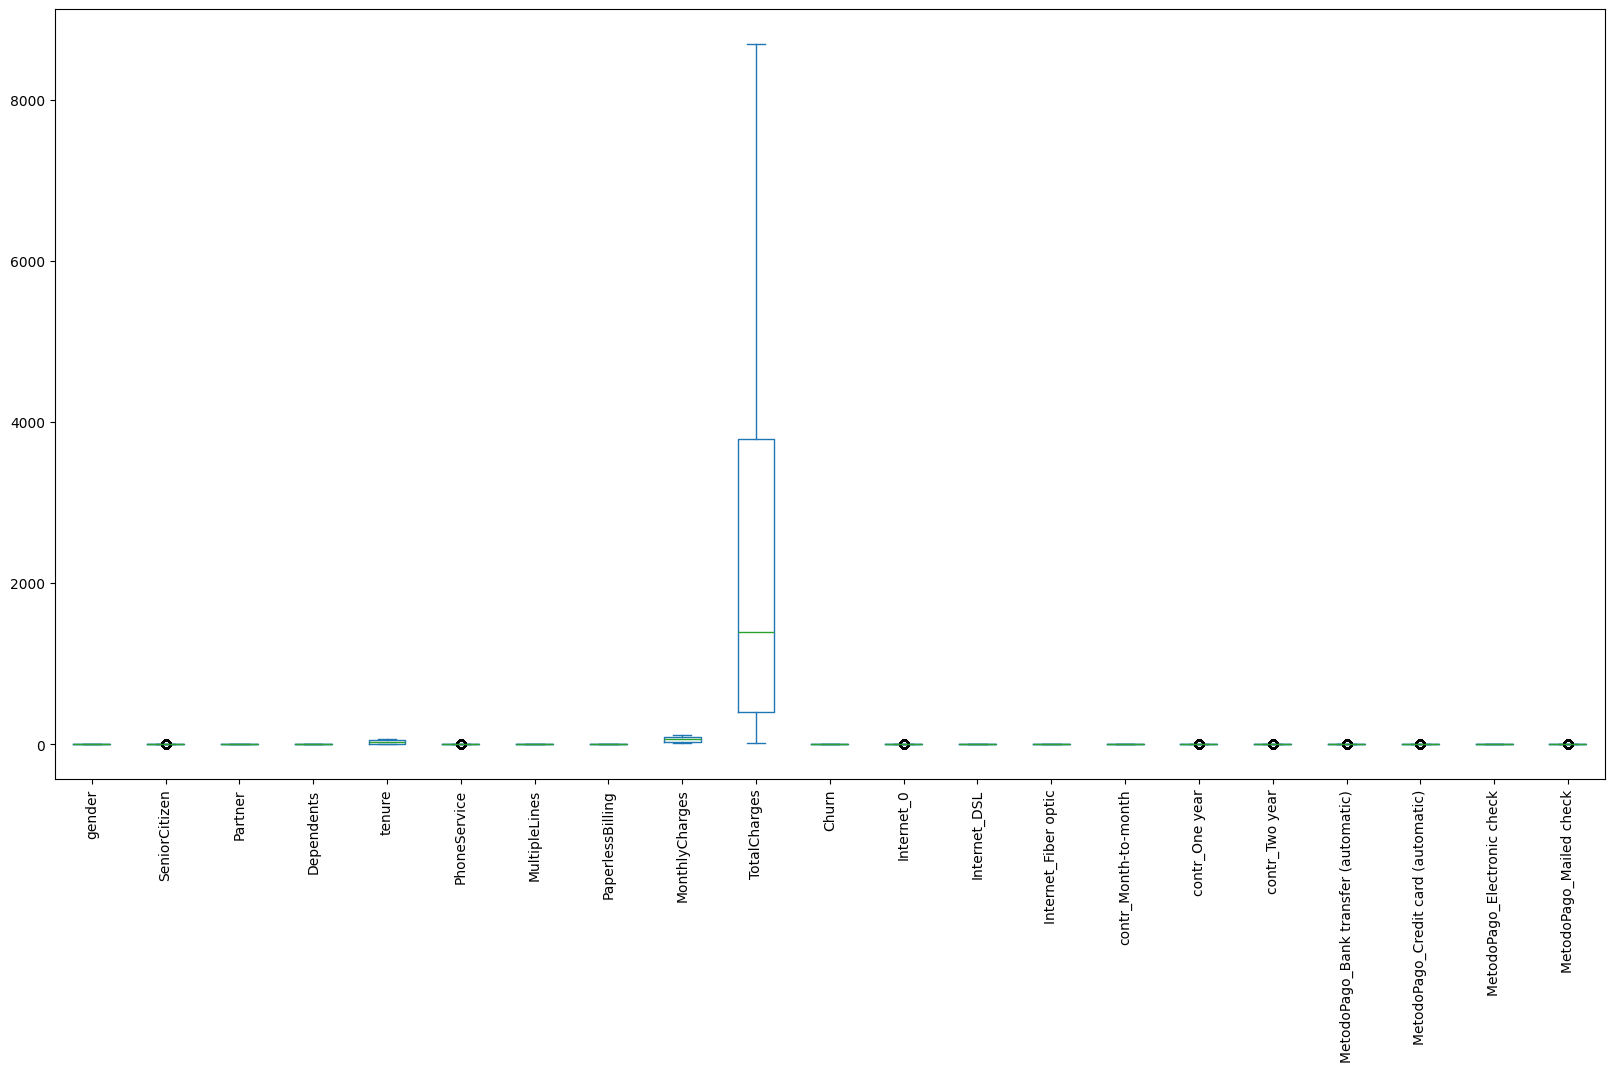

In [95]:
cajas = ["TotalCharges", "MonthlyCharges", "Churn"]
df.plot(kind = "box", figsize = (20,10))
plt.xticks(rotation=90)
plt.show()

Aparentemente, las columnas PhotoService y SeniorCitizen presentan valores atípicos. Sin embargo, al revisar previamente con la función describe(), observamos que en ambas columnas el valor mínimo es 0 y el máximo es 1, por lo que no hay motivo de alarma. Lo que ocurre es que el promedio está cercano a 0, lo que puede dar una impresión equivocada.

# 5. Analizar la distribución de la variable objetivo

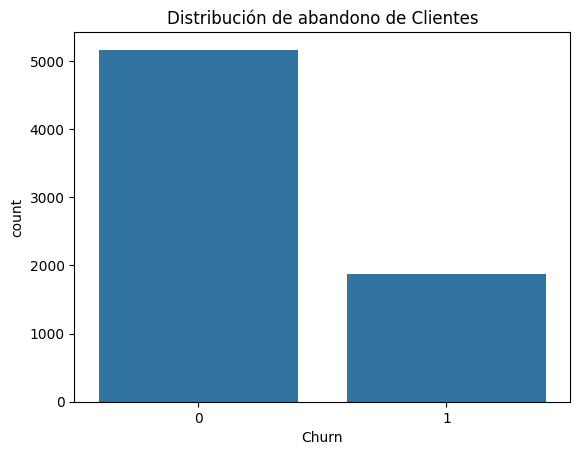

In [96]:
sns.countplot(x='Churn', data=df)
plt.title('Distribución de abandono de Clientes')
plt.show()



En el gráfico titulado "Distribución de abandono de clientes", observamos que el 27% de los clientes han abandonado el servicio mientras que el 73% no lo abandonaron.  
Nuestro objetivo es identificar las características que distinguen a estos clientes, con el fin de comprender mejor su comportamiento y anticipar futuros casos de abandono.


In [97]:
# Porcentaje de clientes que abandonaron el servicio
c = list(df.columns)
c.index("Churn")

17

In [98]:
Clientes0 = df[df.iloc[:,17]==0]["Churn"].count()
Clientes1 = df[df.iloc[:,17]==1]["Churn"].count()
porcent1 = (Clientes0 * 100) / df.shape[0]
porcent0 = (Clientes1 * 100) / df.shape[0]

print(f"Porcentaje de personas que SI abandonaron el servicio {round(porcent1)}%") 
print(f"Porcentaje de personas que NO abandonaron el servicio {round(porcent0)}%") 

Porcentaje de personas que SI abandonaron el servicio 73%
Porcentaje de personas que NO abandonaron el servicio 27%


# 6. Distribución de variables numéricas

El siguiente gráfico permite visualizar la relación entre los cargos mensuales `MonthlyCharges` y la tasa de abandono del servicio `Churn`. 

Se observa que entre los clientes que pagan entre 20 y 40 dólares mensuales, aproximadamente el 90% permanece con el servicio. En contraste, en el rango de 70 a 100 dólares mensuales, cerca del 50% de los clientes abandonan el servicio. Esto sugiere que los cargos mensuales más altos podrían estar asociados con una mayor probabilidad de abandono.


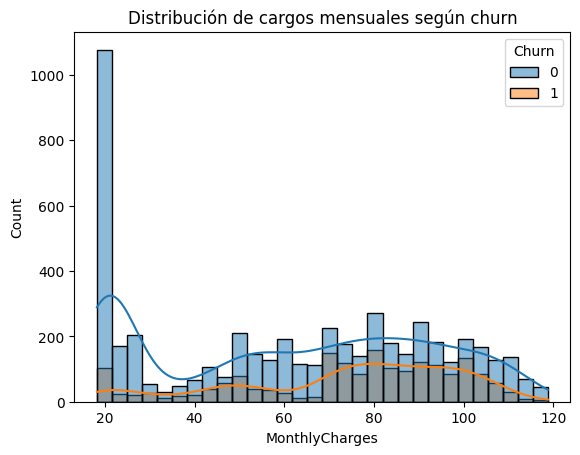

In [99]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribución de cargos mensuales según churn')
plt.show()


# 7. filtrado de datos con graficas


In [100]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Internet_0', 'Internet_DSL', 'Internet_Fiber optic',
       'contr_Month-to-month', 'contr_One year', 'contr_Two year',
       'MetodoPago_Bank transfer (automatic)',
       'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check',
       'MetodoPago_Mailed check'],
      dtype='object')

In [105]:
#Cantidad de mujeres que si abandonaron el servisio
churn_mujeres = df[(df.iloc[:,1]==0) & (df.iloc[:,17]==1)][["Churn"]].shape[0]

In [106]:
#Cantidad de Hombres que si abandonaron el servisio
churn_hombres =df[(df.iloc[:,1]==1) & (df.iloc[:,17]==1)][["Churn"]].shape[0]

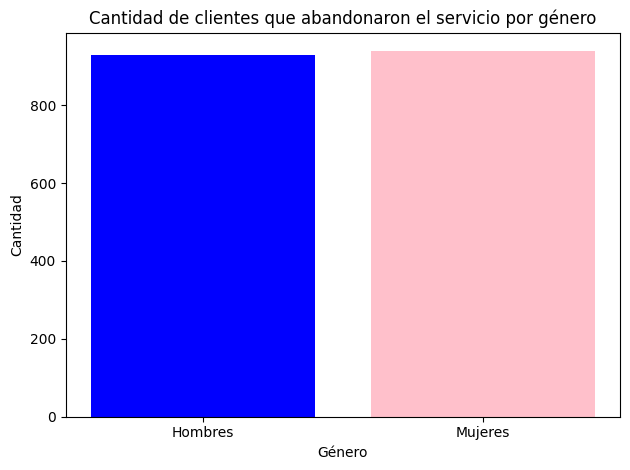

In [107]:
#Crear un histograma
plt.bar(['Hombres', 'Mujeres'], [churn_hombres, churn_mujeres], color=['blue', 'pink'])
plt.title('Cantidad de clientes que abandonaron el servicio por género')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.tight_layout()
plt.show()


In [108]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Internet_0', 'Internet_DSL', 'Internet_Fiber optic',
       'contr_Month-to-month', 'contr_One year', 'contr_Two year',
       'MetodoPago_Bank transfer (automatic)',
       'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check',
       'MetodoPago_Mailed check'],
      dtype='object')

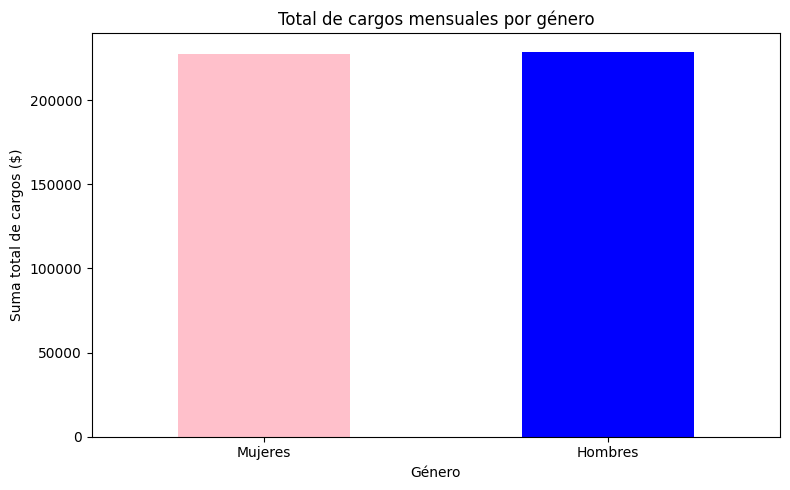

In [109]:
import matplotlib.pyplot as plt

# Calcular suma total de cargos mensuales por género
total_cargos = df.groupby('gender')['MonthlyCharges'].sum()

# Mapear los valores para etiquetas legibles
total_cargos.index = total_cargos.index.map({0: 'Mujeres', 1: 'Hombres'})

# Graficar
plt.figure(figsize=(8,5))
total_cargos.plot(kind='bar', color=['pink', 'blue'])
plt.title('Total de cargos mensuales por género')
plt.ylabel('Suma total de cargos ($)')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Después de analizar los histogramas anteriores, puedo confirmar que la columna gender está balanceada tanto en la variable de abandono (Churn) como en el resto de las columnas. Por lo tanto, es posible que esta variable no sea un factor relevante para el entrenamiento de los modelos de IA para la identificación de clientes que abandonan el servicio.

# 8. Preprocesamiento

Observamos que aún quedan columnas de tipo object. Sin embargo, estas no contienen valores nulos, ya que previamente eliminamos esos registros. Por lo tanto, podemos asegurar que estas columnas contienen datos de tipo texto. A continuación, analizamos los valores únicos presentes en cada una de ellas

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7032 non-null   object 
 1   gender                                7032 non-null   int64  
 2   SeniorCitizen                         7032 non-null   int64  
 3   Partner                               7032 non-null   int64  
 4   Dependents                            7032 non-null   int64  
 5   tenure                                7032 non-null   int64  
 6   PhoneService                          7032 non-null   int64  
 7   MultipleLines                         7032 non-null   int64  
 8   OnlineSecurity                        7032 non-null   object 
 9   OnlineBackup                          7032 non-null   object 
 10  DeviceProtection                      7032 non-null   object 
 11  TechSupport           

Se aplicó `get_dummies` para transformar las variables categóricas en variables dummy (binarias), evitando la multicolinealidad al eliminar la primera categoría (`drop_first=True`). Esto permite que los modelos de machine learning puedan procesar correctamente estas variables.

In [111]:
for i in range(9, 14):
    unique_values = df.iloc[:, i].unique()
    print(f"Valores únicos de la columna en índice {i} ({df.columns[i]}):")
    print(unique_values)
    print("-" * 40)


Valores únicos de la columna en índice 9 (OnlineBackup):
[1 0 'No internet service']
----------------------------------------
Valores únicos de la columna en índice 10 (DeviceProtection):
[0 1 'No internet service']
----------------------------------------
Valores únicos de la columna en índice 11 (TechSupport):
[0 1 'No internet service']
----------------------------------------
Valores únicos de la columna en índice 12 (StreamingTV):
[0 1 'No internet service']
----------------------------------------
Valores únicos de la columna en índice 13 (StreamingMovies):
[0 1 'No internet service']
----------------------------------------


 8   OnlineSecurity                        7032 non-null   object 
 9   OnlineBackup                          7032 non-null   object 
 10  DeviceProtection                      7032 non-null   object 
 11  TechSupport                           7032 non-null   object 
 12  StreamingTV                           7032 non-null   object 
 13  StreamingMovies                       7032 non-null   object 


A continuación voy a reemplazar el valor "No internet service" por 2 en las columnas OnlineSecurity, OnlineBackup, TechSupport y DeviceProtection. Esto se debe a que estas columnas representan servicios de seguridad y respaldo que no están disponibles para algunos clientes, pero que sí cuentan con internet, por lo que es necesario diferenciarlos claramente.

In [112]:
co=df[df.iloc[:,8]==0]["Churn"].count()
c1=df[df.iloc[:,8]==1]["Churn"].count()
casd=df[df.iloc[:,8]=="No internet service"]["Churn"].count()
print(co)
print(c1)
print(casd)

3497
2015
1520


In [114]:
df=df.replace({"No internet service":2})
df.info()
#ahora todas las variebles son numericas

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7032 non-null   object 
 1   gender                                7032 non-null   int64  
 2   SeniorCitizen                         7032 non-null   int64  
 3   Partner                               7032 non-null   int64  
 4   Dependents                            7032 non-null   int64  
 5   tenure                                7032 non-null   int64  
 6   PhoneService                          7032 non-null   int64  
 7   MultipleLines                         7032 non-null   int64  
 8   OnlineSecurity                        7032 non-null   int64  
 9   OnlineBackup                          7032 non-null   int64  
 10  DeviceProtection                      7032 non-null   int64  
 11  TechSupport           

## Escalado de variables numéricas


Se seleccionan las columnas numéricas `tenure`, `MonthlyCharges` y `TotalCharges` para normalizarlas usando `StandardScaler`. Esto estandariza los datos para que tengan media cero y desviación estándar uno, mejorando el rendimiento y la convergencia de los modelos de machine learning.


In [115]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Separar variables y target
### Definición de variables predictoras y objetivo

Se separan las variables independientes (`X`) eliminando las columnas `customerID` y `Churn`, y la variable dependiente (`y`) que corresponde a la columna `Churn`, nuestro objetivo de predicción.


In [116]:
#Original 
X = df.drop(['customerID', 'Churn'], axis=1)

#modificado eliminando bariables sospechosas que tal vez no sirvan para nada
#X = df.drop(['customerID', 'Churn', "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "Internet_DSL"], axis=1)
y = df['Churn']


# 11. Division de datos entrenamiento y pruebas

### División del conjunto de datos en entrenamiento y prueba

Se divide el conjunto de datos en dos partes: 80% para entrenamiento y 20% para prueba, utilizando la función `train_test_split`. Esto permitirá evaluar el desempeño del modelo con datos no vistos durante el entrenamiento.


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)


### Función para evaluar modelos

Esta función entrena el modelo con los datos de entrenamiento, realiza predicciones sobre el conjunto de prueba y muestra métricas clave de evaluación como la exactitud (accuracy), un reporte detallado de clasificación y la matriz de confusión visualizada mediante un heatmap.


In [130]:
#para regresion logistica y arboles
def generar_matriz_confusionLog(model, nombre):
    # Obtener las clases predichas para X_test
    y_pred = model.predict(X_test)
    
    # Importar métricas y librerías para el gráfico
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Mostrar reporte y matriz de confusión
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(nombre)
    plt.show()


In [155]:
def generar_matriz_confusionRed(model, nombre):
    #probabilidades del modelo
    y_prob = model.predict(X_test)

    #probabilidades a clases: si prob > 0.5, predice 1
    y_pred = (y_prob > 0.5).astype(int)
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(nombre)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

## Modelo de Regresion logistica

Se crea y entrena un modelo de regresión logística con un máximo de 500 iteraciones para garantizar la convergencia durante el entrenamiento.


In [126]:
# Regresión logística
from sklearn import linear_model
log_pred = linear_model.LogisticRegression(max_iter=1000) 

In [127]:

log_pred.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Se generan las predicciones del modelo de regresión logística sobre el conjunto de prueba `X_test`.


In [128]:
y_pred = log_pred.predict(X_test)

Calculamos y mostramos la precisión (accuracy) del modelo en los datos de prueba, para evaluar qué tan bien clasifica la variable objetivo.


In [122]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.80


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1826
           1       0.62      0.57      0.60       636

    accuracy                           0.80      2462
   macro avg       0.74      0.73      0.73      2462
weighted avg       0.79      0.80      0.80      2462



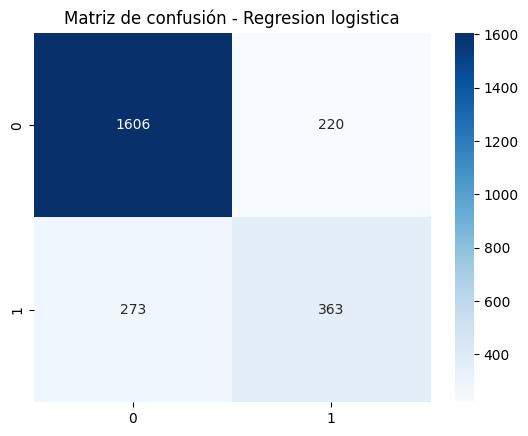

In [157]:
n = "Matriz de confusión - Regresion logistica"
generar_matriz_confusionLog(log_pred, n)

El reporte de clasificación muestra un buen desempeño general del modelo con una precisión (accuracy) del 80%. 

- Para la clase 0 (clientes que no abandonan), el modelo tiene una alta precisión (0.85) y recall (0.89), lo que indica que identifica correctamente a la mayoría de estos clientes.
- Para la clase 1 (clientes que abandonan), la precisión (0.63) y el recall (0.56) son menores, lo que refleja una dificultad mayor para detectar correctamente a los clientes que sí abandonan.
- Las métricas macro promedio (promedio simple de ambas clases) indican que el modelo es más efectivo para la clase mayoritaria.
  
Esto sugiere que, aunque el modelo predice bien a los clientes que permanecen, puede requerir mejoras para aumentar la detección de clientes que abandonan.


## Modelo de Arboles de desicio Random forest

El segundo modelo, un Random Forest, presenta una ligera mejora en la precisión general con un accuracy del 81%.

- Para la clase 0 (clientes que no abandonan), la precisión es alta (0.84) y el recall incluso mejor (0.91), lo que indica que el modelo es muy efectivo identificando correctamente a estos clientes.
- Para la clase 1 (clientes que sí abandonan), la precisión mejora respecto al modelo anterior (0.67), aunque el recall sigue siendo bajo (0.52), mostrando que aún hay dificultad para detectar todos los casos de abandono.
- Las métricas macro promedio reflejan un desempeño balanceado similar al modelo anterior, pero con una ligera mejora en la precisión para la clase positiva.

En resumen, el Random Forest mejora la identificación de clientes que abandonan, pero aún puede optimizarse para capturar mejor esta clase.


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Entrenar
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1826
           1       0.61      0.50      0.55       636

    accuracy                           0.79      2462
   macro avg       0.73      0.70      0.71      2462
weighted avg       0.78      0.79      0.78      2462



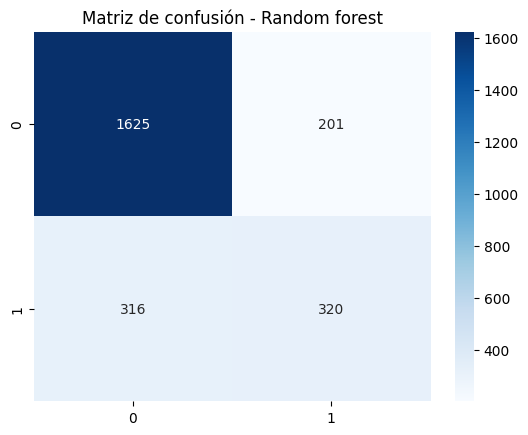

In [137]:
n = "Matriz de confusión - Random forest"
generar_matriz_confusionLog(rf_model, n)

## Red Neuronal 

In [153]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


#Calcular class weights si hay desbalance
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

#aqui se crea el modelo
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

#Callbacks para detener el entrenamiento en cuento se deje de aprender 
#en este caso se evaluara la funsio de perdida con monitor='val_loss'
#cuando se genere 10 coincidencias entonces se detendra el entrenamiento
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, verbose=1)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=24,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    callbacks=[early_stop, reduce_lr], verbose=0)

# Evaluar
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc:.4f}')


D:\Ciencia de Datas\evnIA\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Ciencia de Datas\evnIA\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7221 - auc: 0.8329 - loss: 0.5281
Test Loss: 0.5147, Accuracy: 0.7335, AUC: 0.8361


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1826
           1       0.49      0.82      0.61       636

    accuracy                           0.73      2462
   macro avg       0.70      0.76      0.71      2462
weighted avg       0.81      0.73      0.75      2462



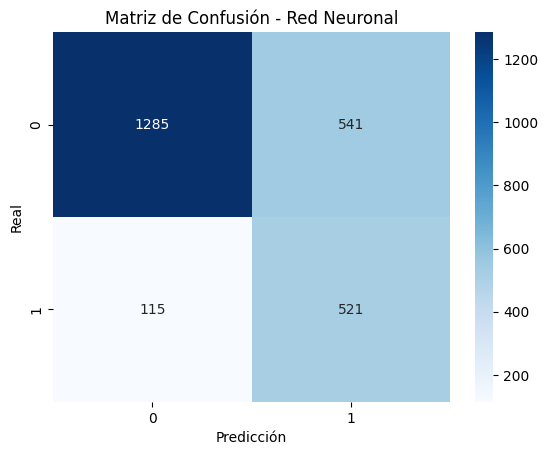

In [159]:
titulo = 'Matriz de Confusión - Red Neuronal'
generar_matriz_confusionRed(model, titulo)

## Comparación de Modelos: Regresión Logística vs Random Forest vs Red Neuronal

| Modelo              | Accuracy | F1-score Clase 1 (Abandono) | Recall Clase 1 | Comentario Principal |
|---------------------|----------|------------------------------|----------------|------------------------|
| **Regresión Logística** | 0.80     | 0.60                         | 0.57           | Buen balance general. Buen rendimiento en ambas clases. |
| **Random Forest**        | 0.79     | 0.55                         | 0.50           | Alta precisión en clase 0, pero bajo recall en abandono. |
| **Red Neuronal**         | 0.73     | 0.61                         | 0.82           | Mayor capacidad de detectar abandonos, aunque menos precisa. |

## Conclusión

- **Regresión Logística** ofrece el mejor equilibrio entre precisión y recall. Es ideal si buscamos un rendimiento uniforme en ambas clases.
- **Random Forest** tiene una buena precisión global, pero no es efectivo detectando abandonos, lo que puede ser un problema si ese es nuestro foco.
- **Red Neuronal** destaca por su recall alto en la clase 1 (abandono), lo cual es útil si el objetivo es minimizar falsos negativos (no detectar abandonos), aunque comete más falsos positivos.

---

### Recomendación

- Si el objetivo es predecir con alta sensibilidad los abandonos, la Red Neuronal es la mejor opción.
- En caso de buscar un modelo más balanceado, elige la Regresión Logística.
- Random Forest no aporta mejoras significativas frente a los otros dos modelos en este caso.